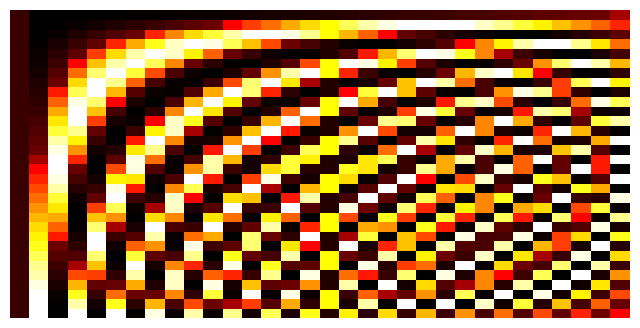

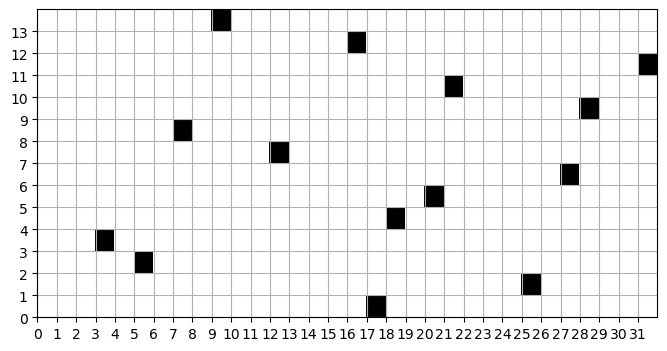

(14, 32)
(32, 32)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import scipy.io
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
from matplotlib.image import imread
mat = scipy.io.loadmat('CC2.mat')
CC = mat['CC']
CC_map = ListedColormap(CC)

p = 14
n = 32


#psi is idct of identity matrix
Psi = np.identity(n)
for i in range(n):
    k=Psi[:,i]
    Psi[:,i]=idct(k)
    

plt.pcolor(np.flipud(Psi),cmap=CC_map)
plt.axis('off')
plt.show()

#Phi is random matrix 
Phi = np.identity(n)
perm = np.random.permutation(n)[:p]
Phi = Phi[perm,:] # compressed measurement
plt.pcolor(np.flipud(Phi),cmap=CC_map)
plt.grid(True)
plt.xticks(np.arange(n))
plt.yticks(np.arange(len(perm)))

plt.show()

print(Phi.shape)
print(Psi.shape)
print(Phi)



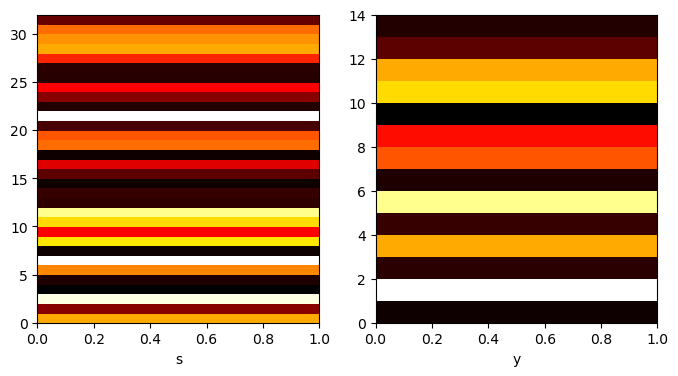

In [36]:
s=np.random.rand(n,1)
# y=Theta @ s 

def plot_s_y(Phi,Psi,s,rate):
    n=s.shape[0]
    
  
    p=n//rate
    
    fig,axs = plt.subplots(1,2)
    axs[0].pcolor(np.flipud(s),cmap=CC_map)
    axs[0].set_xlabel('s')
    
    y= Phi@ s 
    
    axs[1].pcolor(np.flipud(y),cmap=CC_map)
    axs[1].set_xlabel('y')
    
plot_s_y(Phi,Psi,s,4)    
# print(y.shape)

In [37]:
#find rmse 
import math 
def rmse(s,s2):
    mse=np.sum((s-s2)**2)/len(s)
    return math.sqrt(mse)

def mae(s,s2):
    return np.sum(np.absolute(s-s2))/len(s)

rmse: 0.5871396457513997
mae: 0.5168223300303356


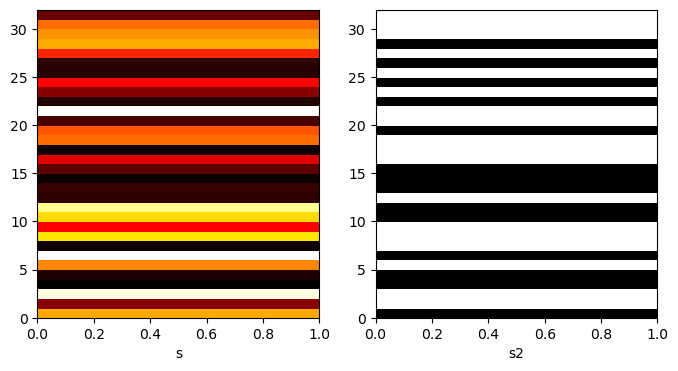

In [47]:
import cvxpy as cvx

def solve_cvx(Phi,Psi,s):
    Theta=Phi @ Psi
    y=Phi @ s
    y=y.flatten()
    x=cvx.Variable(n)
    obj=cvx.Minimize(cvx.sum_squares(Theta @ x-y))
    constr=[cvx.norm(x,1)<=0.01]
    prob=cvx.Problem(obj,constr)
    prob.solve()
    s2=Psi@x.value
    s2=s2.reshape(-1,1)
    return s2

s2_cvx=solve_cvx(Phi,Psi,s)

fig,axs = plt.subplots(1,2)
axs[0].pcolor(np.flipud(s),cmap=CC_map)
axs[0].set_xlabel('s')
    
axs[1].pcolor(np.flipud(s2_cvx),cmap=CC_map)
axs[1].set_xlabel('s2')
print('rmse:',rmse(s,s2_cvx))
print('mae:',mae(s,s2_cvx))

rmse: 0.24090589041007165
mae: 0.1595775371456333


Text(0.5, 0, 's2')

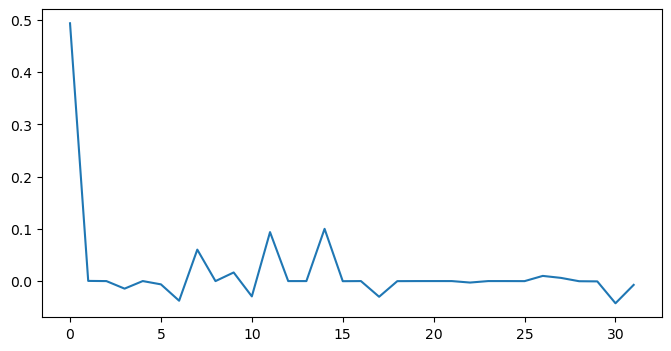

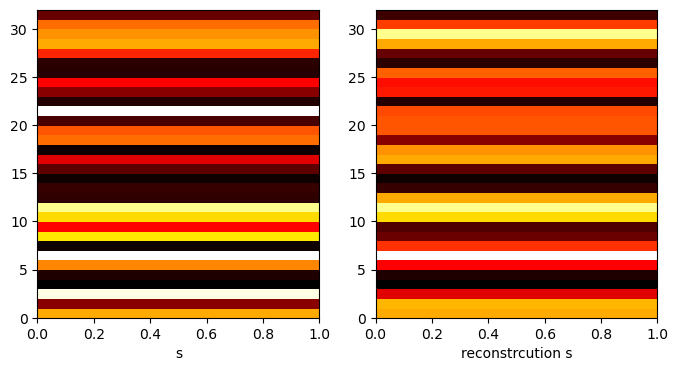

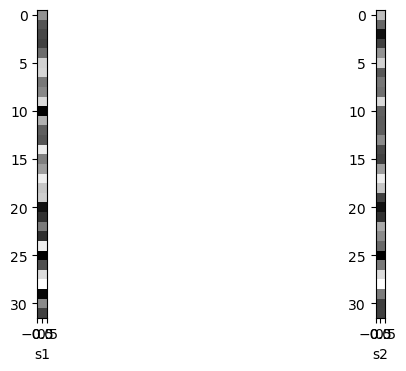

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [55]:
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

Theta=Phi @ Psi
y=Phi @ s
y = y.reshape(-1)
# constr = ({'type': 'eq', 'fun': lambda x:  np.linalg.norm(Theta @ x - y,2)})
constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)

s2_L1 = res.x
plt.figure()
plt.plot(s2_L1)# plot the coefficient 




s2_L1 = res.x
s2_L1=s2_L1.reshape(-1,1)    
fig,axs = plt.subplots(1,2)
axs[0].pcolor(np.flipud(s),cmap=CC_map)
axs[0].set_xlabel('s')

axs[1].pcolor(np.flipud(Psi@ s2_L1),cmap=CC_map)
axs[1].set_xlabel('reconstrcution s')
print("rmse:",rmse(s,Psi@ s2_L1))
print("mae:",mae(s,Psi@ s2_L1))

fig,axs = plt.subplots(1,2)

plt.figure()
axs[0].imshow(s,cmap='gray')
axs[0].set_xlabel('s1')

plt.figure()
axs[1].imshow(Psi @ s2_L1,cmap='gray')
axs[1].set_xlabel('s2')


In [59]:
def L1_solve(Phi,Psi,s):
    """
    output: the reconstructioin of s
    """
    Theta=Phi @ Psi
    y=Phi @ s
    y = y.reshape(-1)
    constr = ({'type': 'eq', 'fun': lambda x: Theta @ x - y})
    x0 = np.linalg.pinv(Theta) @ y
    res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
    s2_L1 = res.x
    s2_L1=s2_L1.reshape(-1,1)
    s2_L1=Psi@s2_L1
    return s2_L1

error with phi with randomized signs 0.24090589041007165


0.24090589041007165

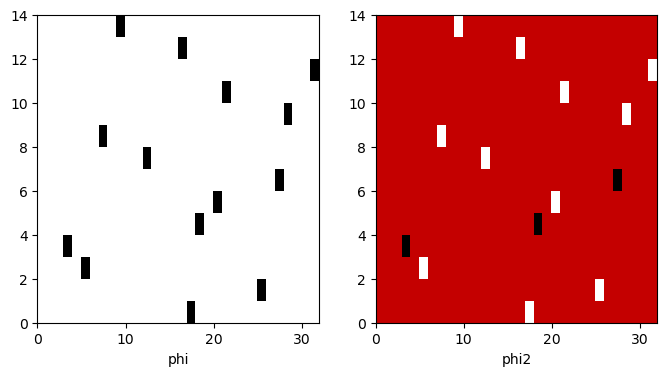

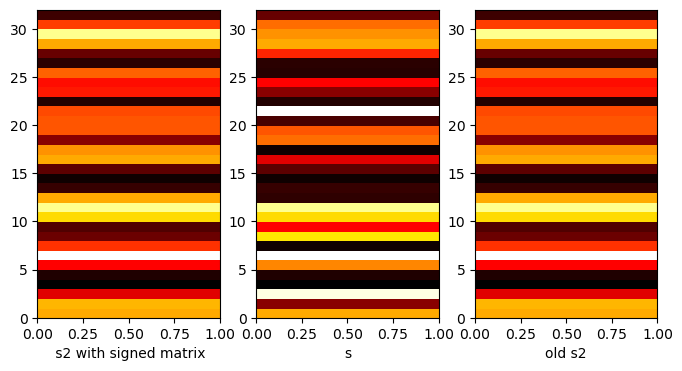

In [64]:
import random

def generate_rademacher_sequence(length):
    return [random.choice([-1, 1]) for _ in range(length)]
def randomized_sign_Phi(Phi):
    seq=generate_rademacher_sequence(n)

    Phi2 = Phi @ np.diag(seq)
    return Phi2

fig,axs = plt.subplots(1,2)
axs[0].pcolor(np.flipud(Phi),cmap=CC_map)
axs[0].set_xlabel('phi')

Phi2=randomized_sign_Phi(Phi)    

axs[1].pcolor(np.flipud(Phi2),cmap=CC_map)
axs[1].set_xlabel('phi2')


# plt.pcolor(np.flipud(Phi2),cmap=CC_map)
# plt.grid(True)
# plt.xticks(np.arange(n))
# plt.yticks(np.arange(len(perm)))

s2_sign=L1_solve(Phi,Psi,s)
# s2_sign=solve_cvx(Phi2,Psi,s)
fig,axs = plt.subplots(1,3)

s2_sign=L1_solve(Phi2,Psi,s)

axs[0].pcolor(np.flipud(s2_sign),cmap=CC_map)
axs[0].set_xlabel(' s2 with signed matrix')
print("error with phi with randomized signs",rmse(s,s2_sign))    
    
axs[1].pcolor(np.flipud(s),cmap=CC_map)
axs[1].set_xlabel('s')

s2=solve_cvx(Phi,Psi,s)
s2=L1_solve(Phi2,Psi,s)
axs[2].pcolor(np.flipud(s2),cmap=CC_map)
axs[2].set_xlabel('old s2')
rmse(s,s2)
#construction looks a lot similar  
#because the phi here is not wavelets basis and not gaussian the randomized sign matrix does not differ much to the original phi 

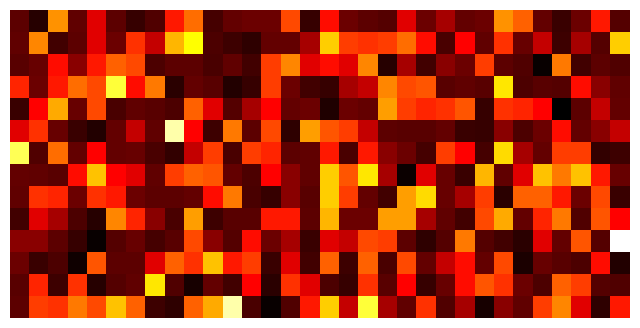

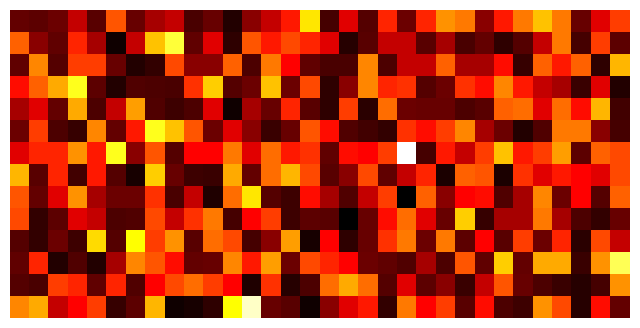

In [70]:
## Plot phi and Theta (2) - Gaussian Random
plt.rcParams['figure.figsize'] = [8, 4]

#change phi to be gaussian 
#mean 0 variance 1
Phi = np.random.normal(0,1,(p,n))

plt.figure()
plt.pcolor(np.flipud(Phi),cmap=CC_map)
plt.axis('off')
plt.show()

Theta = Phi @ Psi
plt.figure()
plt.pcolor(np.flipud(Theta),cmap=CC_map)
plt.axis('off')
plt.show()

mae 0.2927638199601764
mae signed matrix: 0.22293562244781806


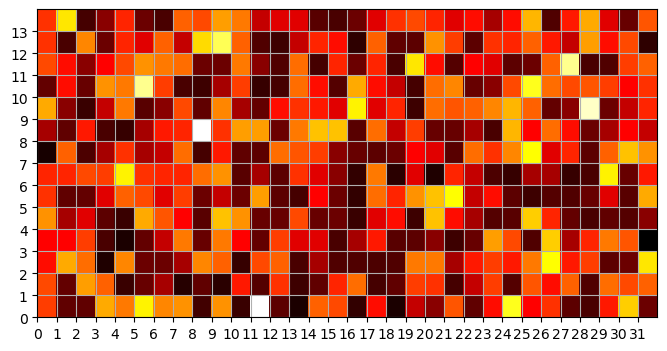

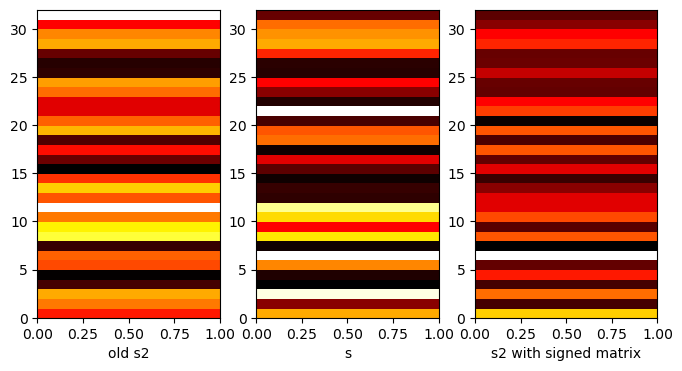

In [72]:
#compare the reconstruction with Phi and reconstruction with Phi with randomized sign
Phi2=randomized_sign_Phi(Phi)

plt.pcolor(np.flipud(Phi2),cmap=CC_map)
plt.grid(True)
plt.xticks(np.arange(n))
plt.yticks(np.arange(len(perm)))

fig,axs = plt.subplots(1,3)
s2=L1_solve(Phi,Psi,s)
axs[0].pcolor(np.flipud(s2),cmap=CC_map)
axs[0].set_xlabel('old s2')
    
# print(rmse(s,s2))
print("mae",mae(s,s2))
axs[1].pcolor(np.flipud(s),cmap=CC_map)
axs[1].set_xlabel('s')

s2=L1_solve(Phi2,Psi,s)

axs[2].pcolor(np.flipud(s2),cmap=CC_map)
axs[2].set_xlabel('s2 with signed matrix')
# print(rmse(s,s2))
print("mae signed matrix:",mae(s,s2))
#we can see reconstruction with the gaussian random matrix with randomized sign look slightly better (with lower error)

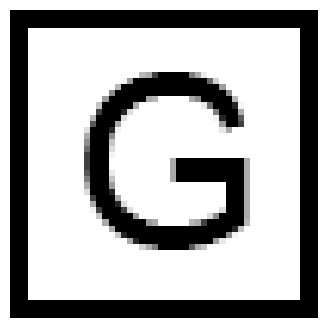

(2500,)


250

In [80]:
#try to apply on an image 
A = imread('testimage.bmp')
s = np.mean(A, -1)
plt.imshow(s,cmap='gray')

plt.axis('off')
plt.show()
img=s.flatten()
print(img.shape)

n=img.shape[0]


rate=10# take 10 percent of original data for measurement
p=n//rate
p

In [81]:
# Psi = dct(np.identity(n))
Psi = np.identity(n)
for i in range(n):
    k=Psi[:,i]
    Psi[:,i]=idct(k)
    
Phi = np.random.normal(0,1,(p,n))    


Phi2=randomized_sign_Phi(Phi)
# print(Phi2.shape)
# print(Psi.shape) 

img2=L1_solve(Phi2,Psi,img)



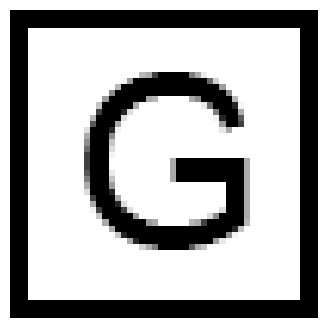

In [89]:
img2=np.reshape(img ,(50,50))
# img2=np.reshape(idct(res.x) ,(50,50))

plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.show()


In [90]:
print("mae signed matrix:",mae(img2.flatten(),img))# reconstruction error 0

mae signed matrix: 0.0
